# Exploratory data analysis of a preprocessed subset of the Lakh Midi Dataset
This notebook loads the preprocessed music data and visualizes:
- The percentage of notes belonging to each instrument (drums, bass, chords, lead) as a pie chart.
- Separate histograms for pitch, duration, step, and velocity for each instrument.

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

PREPROCESSED_DIR = os.path.join('data', 'processed', 'LMD-clean-1000')
file_pattern = os.path.join(PREPROCESSED_DIR, '*.pth')
all_files = sorted([f for f in glob(file_pattern) if not f.endswith('_meta.pth')])

print(f"Found {len(all_files)} preprocessed data files.")

Found 5 preprocessed files.


## Load and Concatenate All Notes

In [4]:
all_notes = []
for f in all_files:
    try:
        rolls = torch.load(f, map_location='cpu')
        for roll in rolls:
            if isinstance(roll, torch.Tensor):
                all_notes.append(roll.numpy())
    except Exception as e:
        print(f"Error loading {f}: {e}")

if not all_notes:
    raise ValueError("No notes loaded. Check the file paths and data format.")

all_notes = np.concatenate(all_notes, axis=0)
print(f"Total notes loaded: {all_notes.shape[0]}")

C:\Users\aniru\AppData\Local\Temp\ipykernel_21712\3589894090.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rolls = torch.load(f, map_location='cpu')


Total notes loaded: 5286890


## Pie chart of note distribution grouped by instrument in percentage

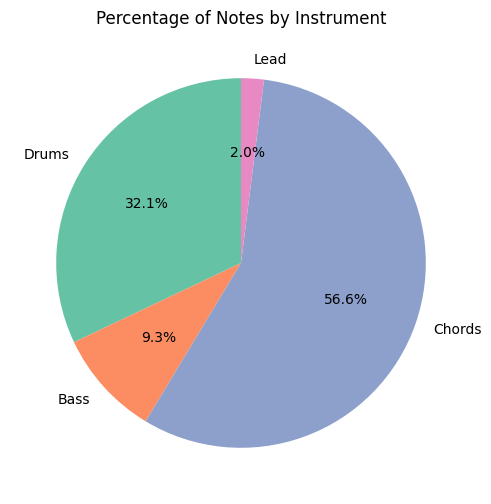

In [ ]:
INSTRUMENTS = ['Drums', 'Bass', 'Chords', 'Lead']
inst_col = 4
inst_counts = [np.sum(all_notes[:, inst_col] == i) for i in range(4)]

plt.figure(figsize=(6, 6))
plt.pie(inst_counts, labels=INSTRUMENTS, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
plt.title('Percentage of Notes by Instrument')
plt.show()

## Histograms for Each Instrument
For each instrument we will plot histograms for pitch, duration, step, and velocity.

Drums: 1694526 notes


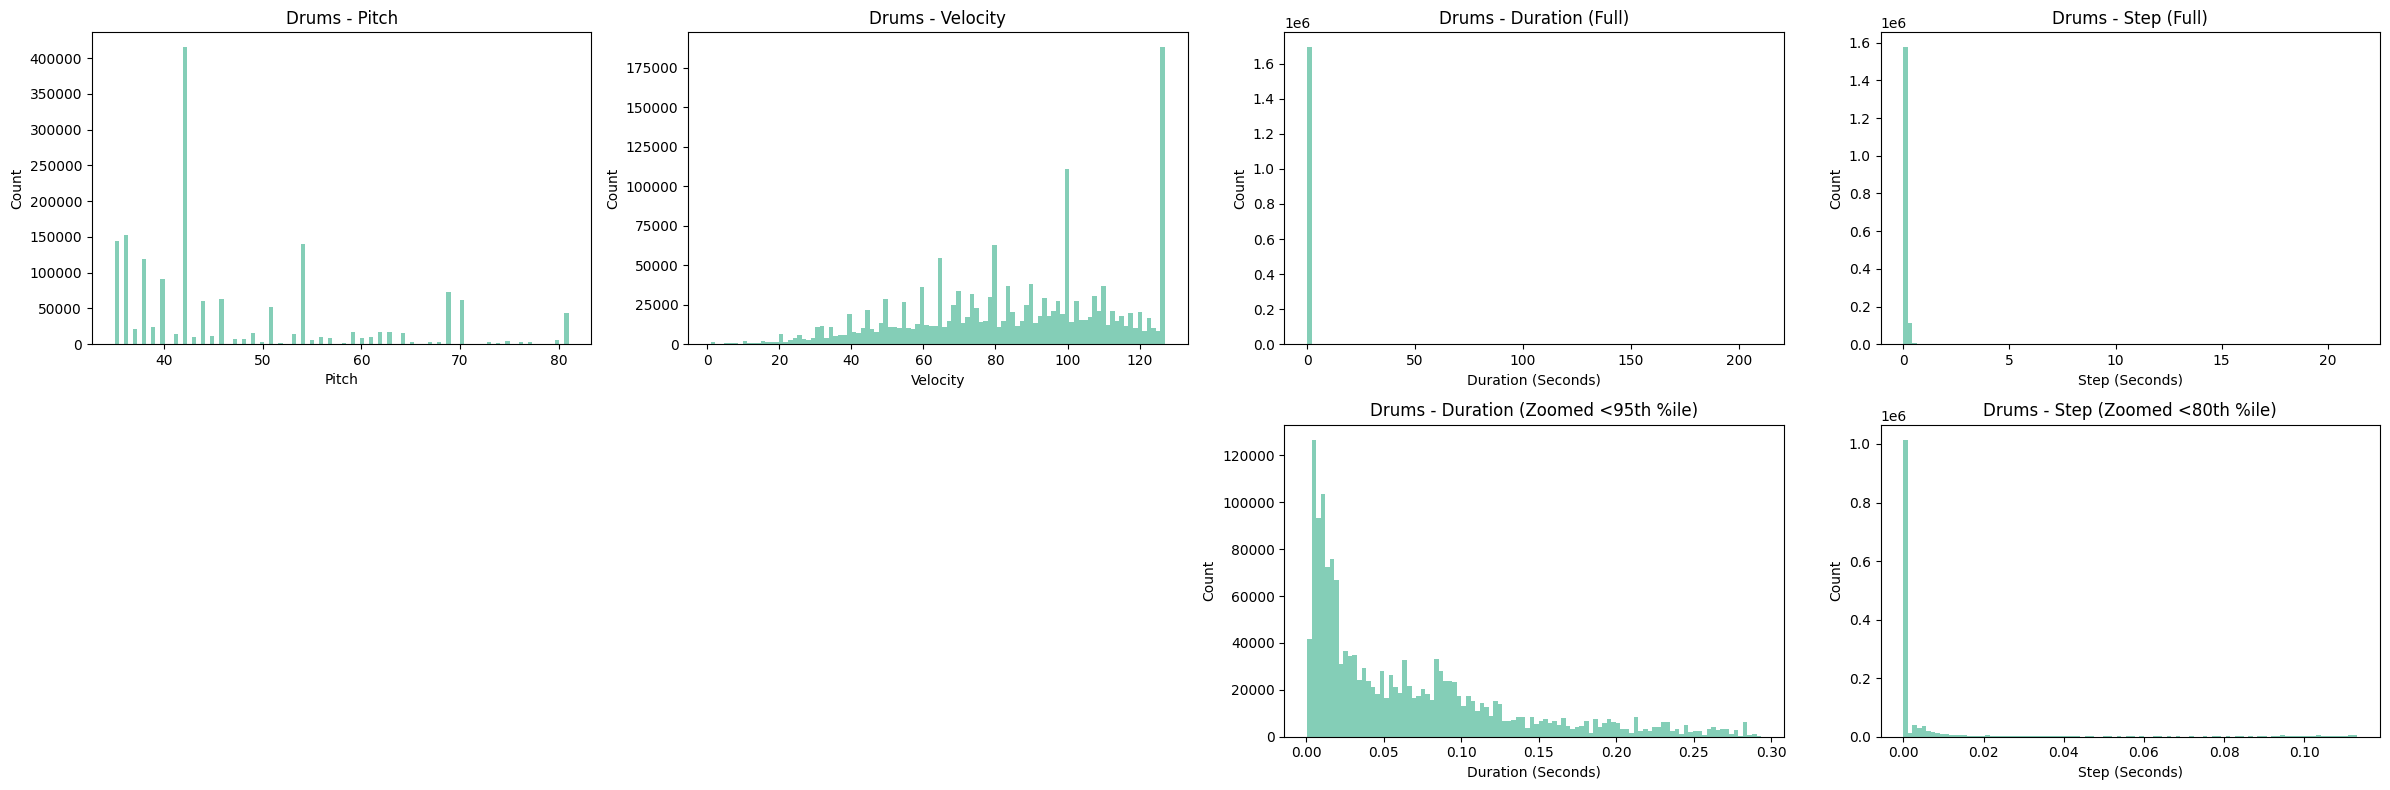

Bass: 492681 notes


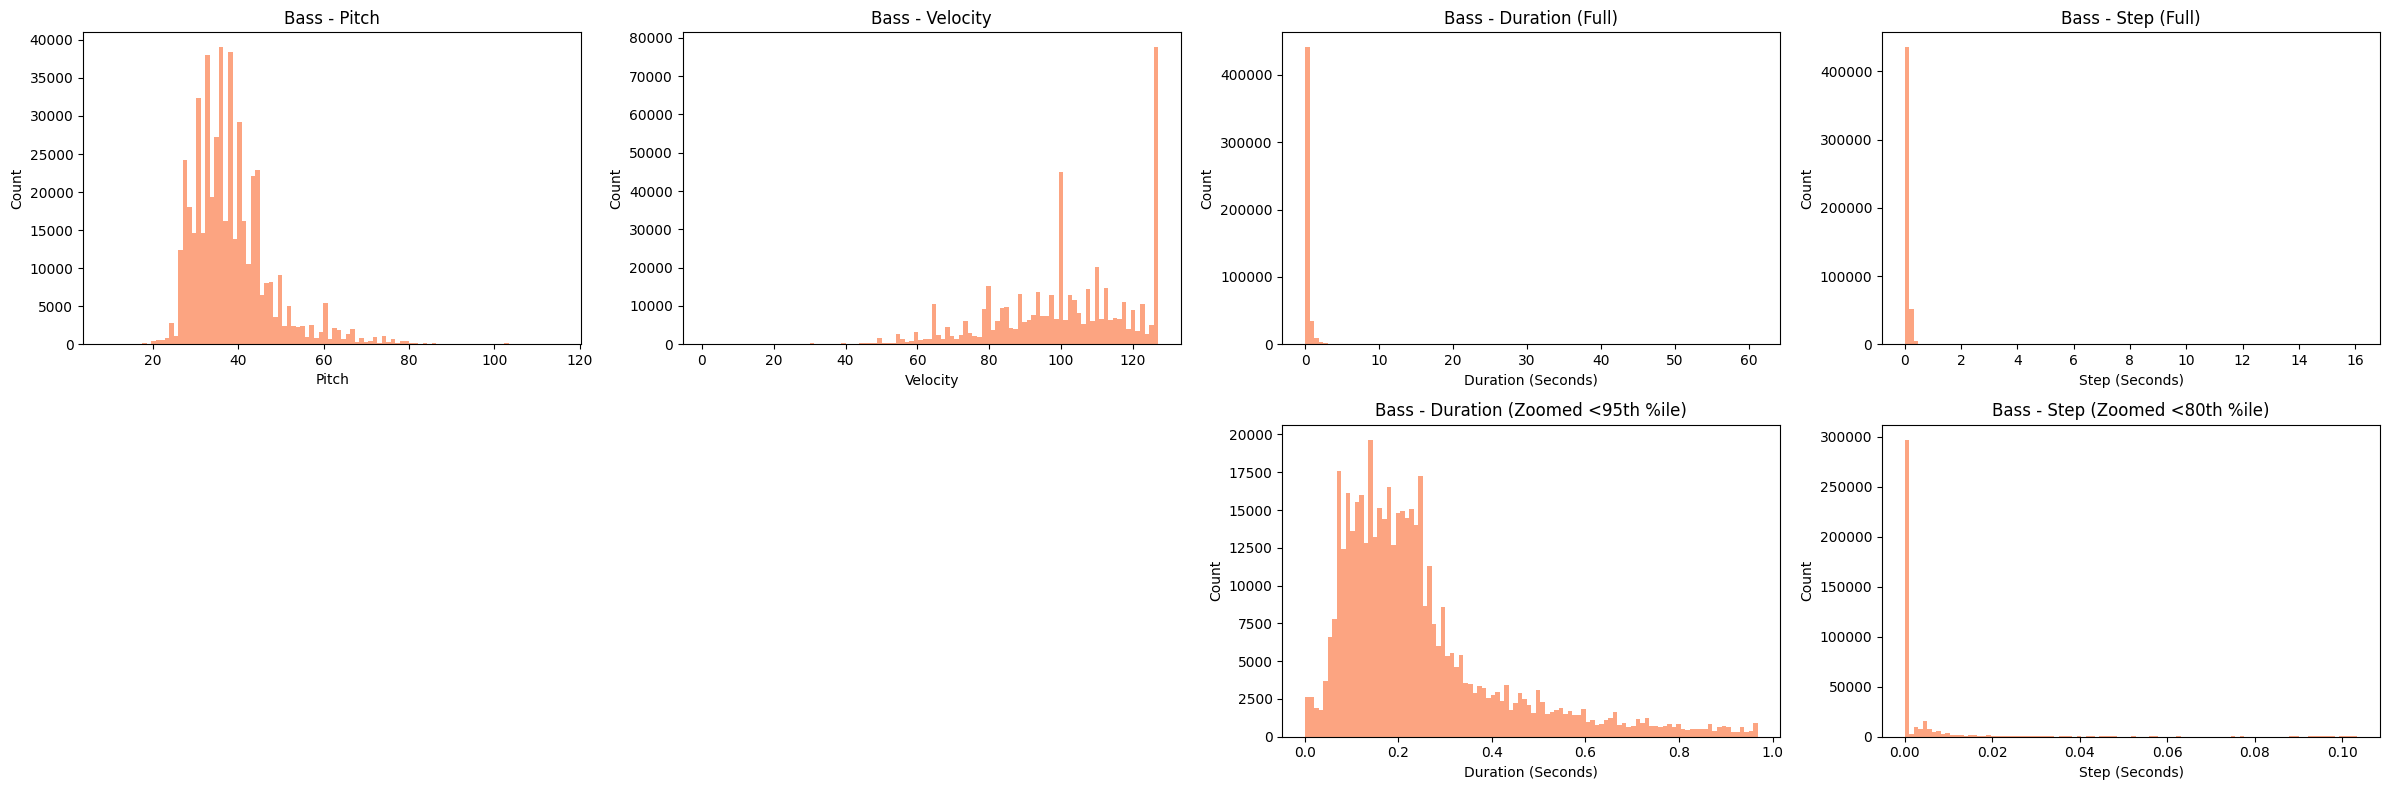

Chords: 2994580 notes


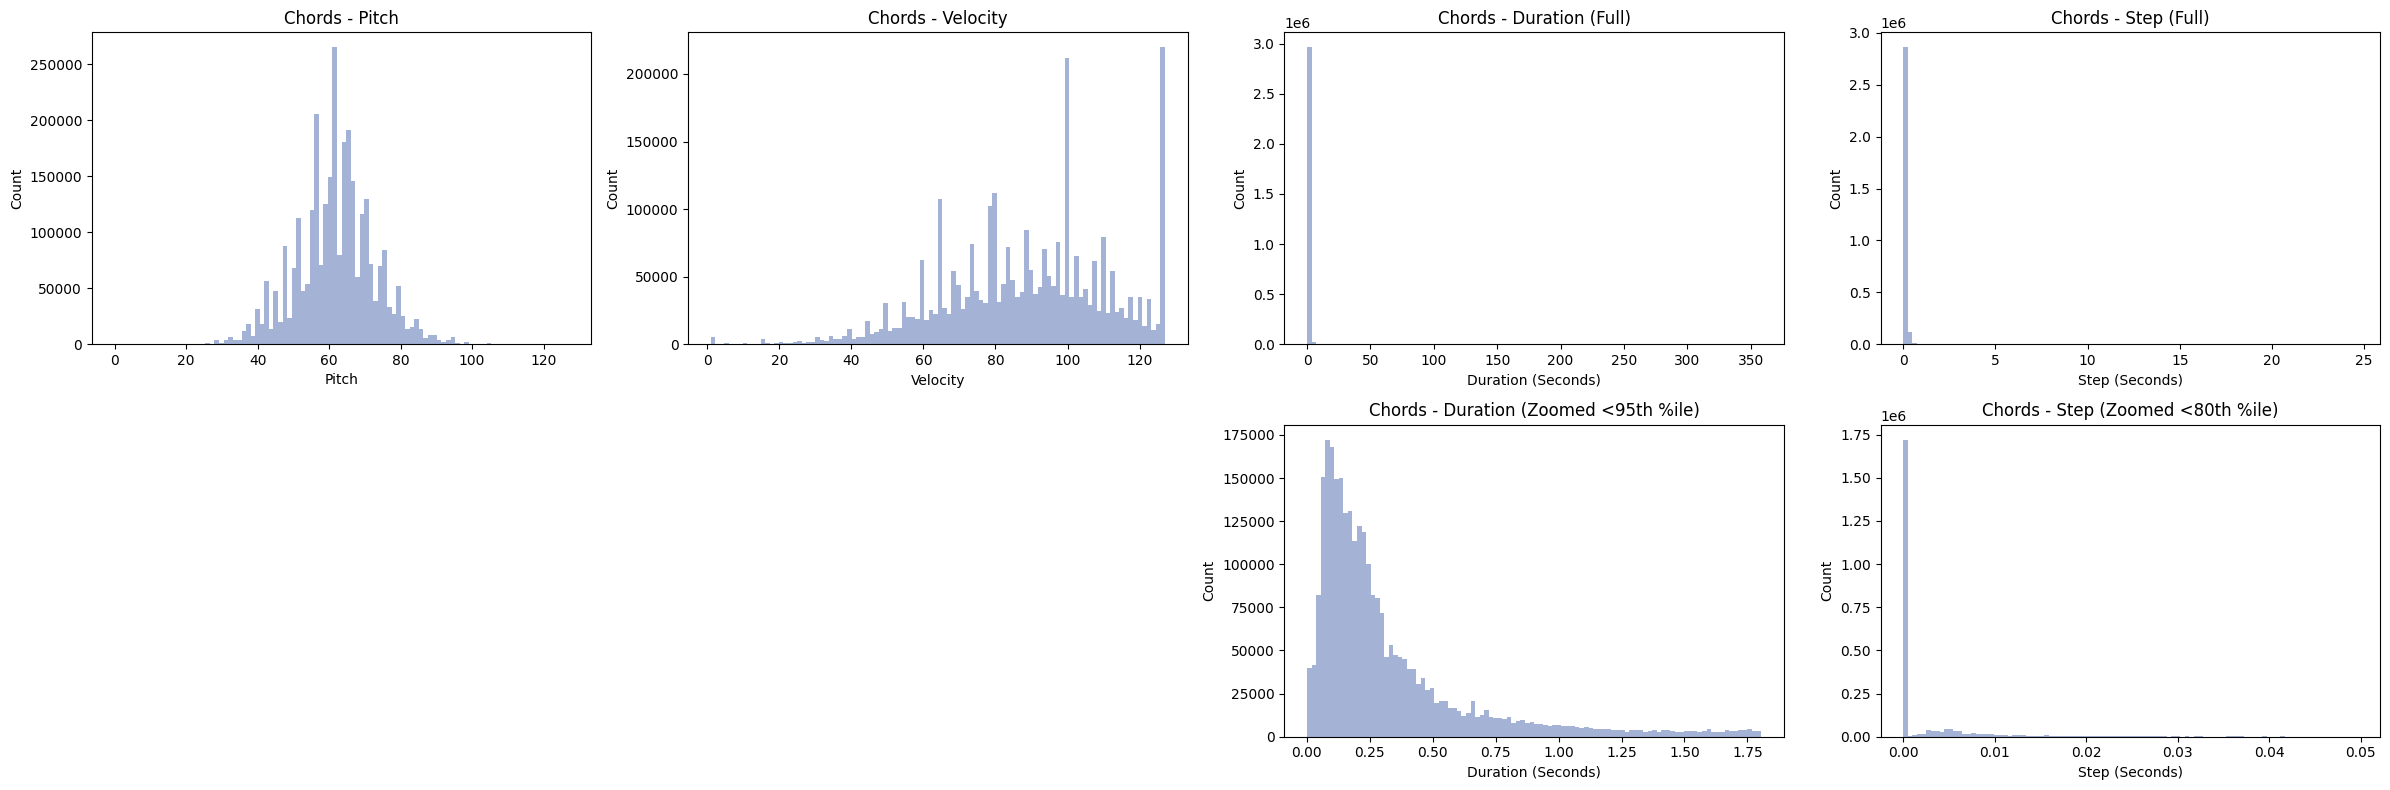

Lead: 105103 notes


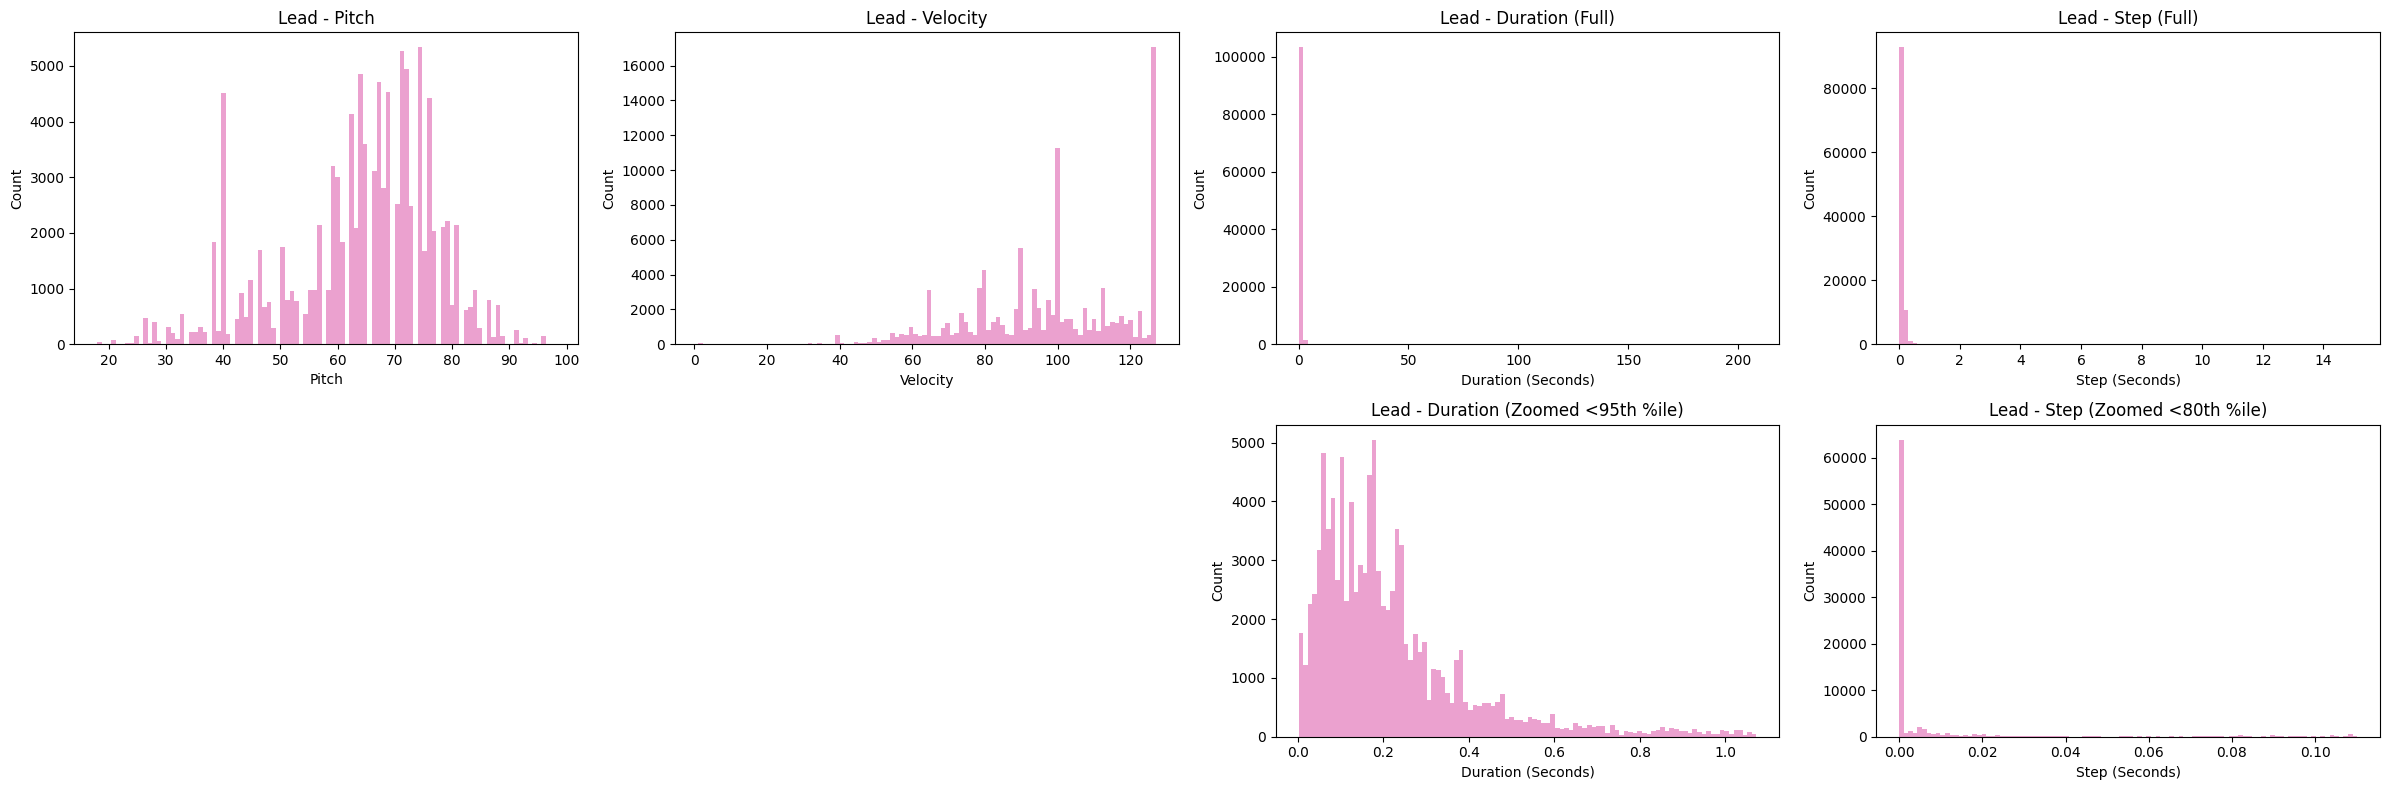

In [7]:
features = ['Pitch', 'Velocity', 'Duration', 'Step']
feature_indices = [0, 1, 2, 3]

for i, inst in enumerate(INSTRUMENTS):
    inst_notes = all_notes[all_notes[:, inst_col] == i]
    print(f"{inst}: {len(inst_notes)} notes")
    fig, axs = plt.subplots(2, 4, figsize=(24, 8))
    # Pitch
    axs[0, 0].hist(inst_notes[:, 0], bins=100, color=plt.cm.Set2(i), alpha=0.8)
    axs[0, 0].set_title(f"{inst} - Pitch")
    axs[0, 0].set_xlabel("Pitch")
    axs[0, 0].set_ylabel('Count')
    # Velocity
    axs[0, 1].hist(inst_notes[:, 1], bins=100, color=plt.cm.Set2(i), alpha=0.8)
    axs[0, 1].set_title(f"{inst} - Velocity")
    axs[0, 1].set_xlabel("Velocity")
    axs[0, 1].set_ylabel('Count')
    # Duration (full range)
    axs[0, 2].hist(inst_notes[:, 2], bins=100, color=plt.cm.Set2(i), alpha=0.8)
    axs[0, 2].set_title(f"{inst} - Duration (Full)")
    axs[0, 2].set_xlabel("Duration (Seconds)")
    axs[0, 2].set_ylabel('Count')
    # Step (full range)
    axs[0, 3].hist(inst_notes[:, 3], bins=100, color=plt.cm.Set2(i), alpha=0.8)
    axs[0, 3].set_title(f"{inst} - Step (Full)")
    axs[0, 3].set_xlabel("Step (Seconds)")
    axs[0, 3].set_ylabel('Count')
    # Duration (zoomed)
    duration = inst_notes[:, 2]
    duration_zoom = duration[duration < np.percentile(duration, 95)]
    axs[1, 2].hist(duration_zoom, bins=100, color=plt.cm.Set2(i), alpha=0.8)
    axs[1, 2].set_title(f"{inst} - Duration (Zoomed <95th %ile)")
    axs[1, 2].set_xlabel("Duration (Seconds)")
    axs[1, 2].set_ylabel('Count')
    # Step (more zoomed: <80th percentile)
    step = inst_notes[:, 3]
    step_zoom = step[step < np.percentile(step, 80)]
    axs[1, 3].hist(step_zoom, bins=100, color=plt.cm.Set2(i), alpha=0.8)
    axs[1, 3].set_title(f"{inst} - Step (Zoomed <80th %ile)")
    axs[1, 3].set_xlabel("Step (Seconds)")
    axs[1, 3].set_ylabel('Count')
    # Hide unused subplots
    axs[1, 0].axis('off')
    axs[1, 1].axis('off')
    plt.tight_layout()
    plt.show()